### Nearest Neighbours
* Nearest Neighbours for Classification
* Nearest Neighbours for Regression
* Understanding Data Preprocessing
* Data PreProcessing Required for Nearest Neighbours
* Understand Bias-Variance Tradeoff

<hr>

### Recap of yesterday's discussion
* Calculation of vector distances
    - Euclidian
    - Manhatten
    - Minkowiski

### Nearest Neighbour for Classification

In [26]:
from sklearn.datasets import make_blobs, make_regression

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [52]:
X,Y = make_blobs(n_features=2, n_samples=50, cluster_std=5, centers=2)

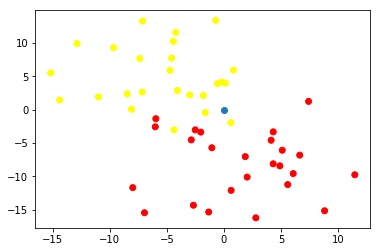

In [53]:
plt.scatter(x=X[:,0], y=X[:,1], c=Y, cmap='autumn')
plt.scatter(x=[0],y=[0])

In [54]:
Y[:5]

array([0, 0, 1, 0, 0])

In [55]:
from sklearn.neighbors import KNeighborsClassifier

In [56]:
knc = KNeighborsClassifier(n_neighbors=5)

In [57]:
knc.fit(X,Y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [58]:
knc.predict([[0,0]])

array([1])

In [59]:
knc.kneighbors([[0,0]])

(array([[1.68191802, 2.02558309, 2.79372722, 3.73122709, 3.91387218]]),
 array([[25,  5, 19, 11, 27]]))

In [60]:
neighbours = X[[25,  5, 19, 11, 27]]

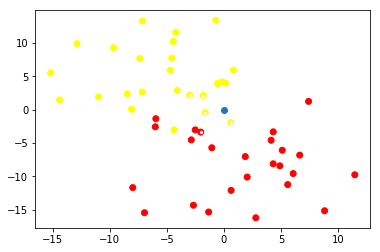

In [61]:
plt.scatter(x=X[:,0], y=X[:,1], c=Y, cmap='autumn')
plt.scatter(x=[0],y=[0])
plt.scatter(neighbours[:,0],neighbours[:,1],s=5,c='w')

### For regression

In [65]:
X,Y = make_regression(n_features=2, n_samples=50)

In [66]:
X[:5]

array([[-1.29516923,  0.27373086],
       [ 0.70023581,  1.39645056],
       [ 2.81882403, -0.15246632],
       [-0.65782008,  0.15582754],
       [-0.03126388,  0.41505407]])

In [67]:
Y[:5]

array([-54.75938246,  72.80219681, 131.57728034, -27.34259717,
        10.10198202])

In [68]:
from sklearn.neighbors import KNeighborsRegressor

In [69]:
knr = KNeighborsRegressor(n_neighbors=5)

In [70]:
knr.fit(X,Y)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [71]:
knr.kneighbors([[0,0]])

(array([[0.29431798, 0.31245516, 0.41622988, 0.43475572, 0.44141411]]),
 array([[26, 44,  4, 32, 31]]))

In [72]:
neighbours = X[[26, 44,  4, 32, 31]]

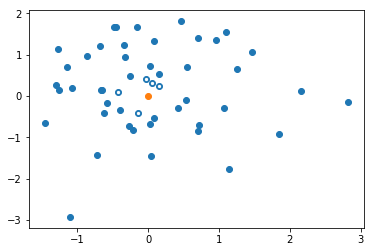

In [73]:
plt.scatter(x=X[:,0], y=X[:,1], cmap='autumn')
plt.scatter(x=[0],y=[0])
plt.scatter(neighbours[:,0],neighbours[:,1],s=5,c='w')

In [77]:
import numpy as np

In [78]:
np.mean(Y[[26, 44,  4, 32, 31]])

-0.12894249893987036

In [79]:
knr.predict([[0,0]])

array([-0.1289425])

In [80]:
Y[[26, 44,  4, 32, 31]]

array([ 14.55012978,  11.21553523,  10.10198202, -18.51701876,
       -17.99534077])

### Why Data Preprocessing
* Data is never in a state such that ML algo works best.
* Text don't work on ML. Those have to be converted into number
* Numbers need to be scaled for better performance

In [82]:
import pandas as pd
house_data = pd.read_csv('https://raw.githubusercontent.com/edyoda/data-science-complete-tutorial/master/Data/house_rental_data.csv.txt', index_col='Unnamed: 0')

In [83]:
house_data.head()

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
1,1177.698,2,7,2,2,2,62000
2,2134.800,5,7,4,2,2,78000
3,1138.560,5,7,2,2,1,58000
4,1458.780,2,7,3,2,2,45000
5,967.776,11,14,3,2,2,45000


In [85]:
house_data[['Sqft','Bedroom','Price']][:5]

,Sqft,Bedroom,Price
1,1177.698,2,62000
2,2134.800,4,78000
3,1138.560,2,58000
4,1458.780,3,45000
5,967.776,3,45000


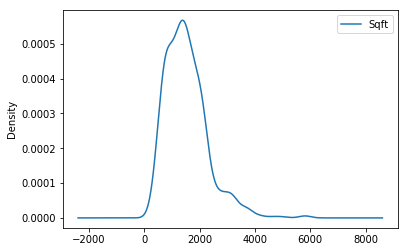

In [88]:
house_data[['Sqft']].plot.kde()

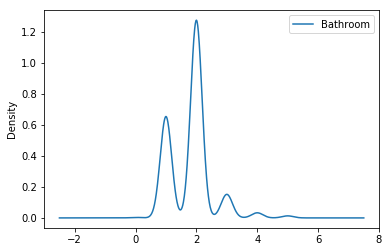

In [89]:
house_data[['Bathroom']].plot.kde()

In [90]:
from sklearn.preprocessing import MinMaxScaler

In [91]:
mm = MinMaxScaler()

### Splitting Data into feature & target columns

In [92]:
feature = house_data.drop(columns=['Price'])
target = house_data.Price

In [93]:
feature[:5]

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom
1,1177.698,2,7,2,2,2
2,2134.800,5,7,4,2,2
3,1138.560,5,7,2,2,1
4,1458.780,2,7,3,2,2
5,967.776,11,14,3,2,2


In [94]:
target[:5]

1    62000
2    78000
3    58000
4    45000
5    45000
Name: Price, dtype: int64

### Splitting data(feature & target) into train & test

In [95]:
from sklearn.model_selection import train_test_split

trainX, testX, trainY, testY = train_test_split(feature, target)

In [96]:
trainX.shape

(483, 6)

In [98]:
trainY.shape

(483,)

In [99]:
mm = MinMaxScaler()

In [100]:
mm.fit(trainX)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [101]:
mm.data_min_

array([359.358,   1.   ,   1.   ,   1.   ,   0.   ,   0.   ])

In [102]:
mm.data_max_

array([5.856468e+03, 2.100000e+01, 2.700000e+01, 6.000000e+00,
       3.000000e+00, 5.000000e+00])

In [103]:
mm.data_range_

array([5.49711e+03, 2.00000e+01, 2.60000e+01, 5.00000e+00, 3.00000e+00,
       5.00000e+00])

In [105]:
trainX_tf = mm.transform(trainX)

In [106]:
knr = KNeighborsRegressor(n_neighbors=5)

In [107]:
knr.fit(trainX_tf,trainY)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [109]:
testX_tf = mm.transform(testX)

In [111]:
predictions = knr.predict(testX_tf)

In [113]:
pd.DataFrame({'Actual':testY, 'Prediction':predictions})[:5]

,Actual,Prediction
317,39999,48800.0
480,45000,43200.0
580,33000,32177.6
639,70000,88300.0
289,250000,126291.2


In [114]:
knr.score(testX_tf,testY)

0.582182799618234

### Easy way to find k

In [115]:
for k in range(2,8):
    print ('k = ',k)
    knr = KNeighborsRegressor(n_neighbors=k)
    knr.fit(trainX_tf,trainY)
    print('Train Acc',knr.score(trainX_tf,trainY))
    print('Test Acc',knr.score(testX_tf,testY))

k =  2
Train Acc 0.9044810195904333
Test Acc 0.5437860972716704
k =  3
Train Acc 0.8747812369131488
Test Acc 0.5582247952465427
k =  4
Train Acc 0.8453298165561648
Test Acc 0.5773060686499472
k =  5
Train Acc 0.8176449142450308
Test Acc 0.582182799618234
k =  6
Train Acc 0.7878706210211102
Test Acc 0.5793662842096652
k =  7
Train Acc 0.7664218095662398
Test Acc 0.5691538654216997


### Important Conclusions
* k is inversely proportional to model complexity
* Model complexity is directly proportinal to variance & inversely proportional to bias